## MIT 18.065 - Matrix Methods in Data Analysis, Signal Processing, and Machine Learning

## Lecture 3 Sections I.3 - I.5 and Problems (from textbook Section I.5)
- I.3: Fundemental Subspaces

- I.4: Elimination and $A = L \cdot U$

- I.5 : Orthogonal Matricies

In [1]:
include("local_startup.jl");

In [2]:
include("KTBC.jl");

**LaTeX Setup** (run this cell early)
$$
\newcommand{\cv}[1]{\begin{bmatrix} #1 \end{bmatrix}}
\newcommand{\mat}[1]{\begin{bmatrix} #1 \end{bmatrix}}
\newcommand{\norm}[1]{\left\| #1 \right\|}
\newcommand{\abs}[1]{\left| #1 \right|}
$$

Verify: $x = \cv{1 \\ 2}$

In [3]:
# Plots defaults for graphs
using Plots
default(                                                                                                                                                                                                         
    aspect_ratio = :equal,                                                                                                                                                                                       
    grid = true,                                                                                                                                                                                                 
    framestyle = :origin,  # This centers axes at origin!                                                                                                                                                        
    legend = :topright) 

### I.3 Fundemental Subspaces

#### Example 1

In [4]:
A = [1 2; 3 6];
u = [1,3];
v= [1,2];

In [5]:
@Lx A = $A

L"$A = \left[
\begin{array}{cc}
1 & 2 \\
3 & 6 \\
\end{array}
\right]$"

In [6]:
@Lx A = $A = u*v^T = $u * $(Cx(v'))

L"$A = \left[
\begin{array}{cc}
1 & 2 \\
3 & 6 \\
\end{array}
\right] = u \cdot v^{T} = \left[
\begin{array}{c}
1 \\
3 \\
\end{array}
\right] \cdot \left[
\begin{array}{cc}
1 & 2 \\
\end{array}
\right]$"

- Column Space $C(A)$ is line through $u = \cv{1 \\ 3}$ contains all combinations of columns in $A$
- Row Space $C(A^T)$ is the line through $v = \cv{1 \\2}$ contains all combinations of rows in $B$
- Null Space $N(A)$ is the line through $x = \cv{2 \\ -1}$ where $x$ are solutions to $A \cdot x = 0$
- Null Space $N(A^T)$ is the line through $y = \cv{3 \\ -1}$ where $x$ are solutions to $A^T \cdot y = 0$ 

Here consider the typical solution of the equation $A \cdot x = 0, we can see why these are orthogonal$

In [7]:
@Lx $A * [2, -1] = [0,0]

L"$\left[
\begin{array}{cc}
1 & 2 \\
3 & 6 \\
\end{array}
\right] \cdot \left[
\begin{array}{c}
2 \\
-1 \\
\end{array}
\right] = \left[
\begin{array}{c}
0 \\
0 \\
\end{array}
\right]$"

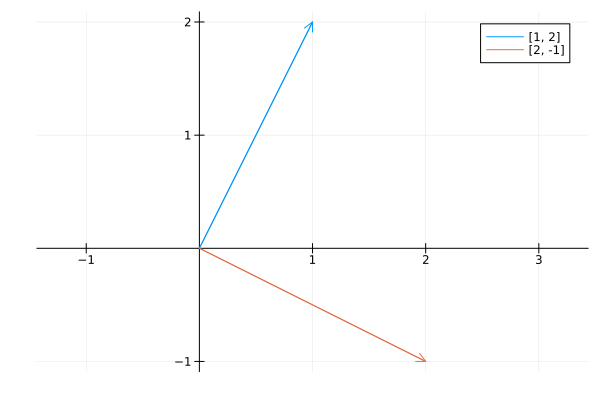

In [8]:
v1 = [1, 2]
v2 = [2,-1]

plot([0, v1[1]], [0, v1[2]], arrow=true, label="$v1")
plot!([0, v2[1]], [0, v2[2]], arrow=true, label="$v2")

#### Example 2

In [9]:
B= [1 -2 -2; 3 -6 -6]
@Lx B=$B

L"$B = \left[
\begin{array}{ccc}
1 & -2 & -2 \\
3 & -6 & -6 \\
\end{array}
\right]$"

What are the solutions?
- $B$ is $2 \times 3$
- $\text{Rank}(B) = 1$
- $B$ is $m \times n$ and since $\text{len}(x) = 3$, ($n - 1) = (3 - 1) = 2$
- Accordingly there should be $2$ solutions to $B \cdot x = 0$

In [10]:
display(@Lx x=[a,b,c])
display(@Lx B*x=0)
display(@Lx B*[a,b,c]=[0,0])

L"$x = \left[
\begin{array}{c}
a \\
b \\
c \\
\end{array}
\right]$"

L"$B \cdot x = 0$"

L"$B \cdot \left[
\begin{array}{c}
a \\
b \\
c \\
\end{array}
\right] = \left[
\begin{array}{c}
0 \\
0 \\
\end{array}
\right]$"

Using julia command `nullspace` find it for N. Multiplying by '3' just converts to integers

In [11]:
N = nullspace(B) * 3
@Lx N= $N

L"$N = \left[
\begin{array}{cc}
2.0 & 2.0 \\
2.0 & -1.0 \\
-1.0 & 2.0 \\
\end{array}
\right]$"

Verify that both vectors of $N$ are solutions of $B$

In [12]:
@Lx B*N = $(B*N)

L"$B \cdot N = \left[
\begin{array}{cc}
0.0 & 0.0 \\
0.0 & 0.0 \\
\end{array}
\right]$"

Verify that these are normal by taking dot produt of $n_1^T \cdot n_2$

In [13]:
N[:,1]'* N[:,2]

0.0

Ok, they are normal, but are they orthonormal?

In [14]:
norm(N[:,1]), norm(N[:,2])

(3.0, 3.0)

In [15]:
1/3*N # N = 1/3/N

3×2 Matrix{Float64}:
  0.666667   0.666667
  0.666667  -0.333333
 -0.333333   0.666667

The nullspace $N(B) = N$ is a plane.

These two vectors of $\cv{N_{11} \\ N_{12} \\ N_{13}}$, $\cv{N_{21} \\ N_{22} \\ N_{23}}$form an **orthonormal** basis for the nullspace $N(B)$

Example 3

$C$ is a $5 \times 4$ matrix

In [16]:
C = [-1 1 0 0; -1 0 1 0; 0 -1 1 0; 0 -1 0 1; 0 0 -1 1]
@Lx C= $C

L"$C = \left[
\begin{array}{cccc}
-1 & 1 & 0 & 0 \\
-1 & 0 & 1 & 0 \\
0 & -1 & 1 & 0 \\
0 & -1 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{array}
\right]$"

In [17]:
rank(C)

3

For the nullspace N(C):
- Dim of $C$ is $(n \times m) = (4 \times 3)$
- $N(C)$ in $ R^4$ i.e., $n=4$
- Rank $N(C)$ = $r = 3$
- Dim $N(C)$ = $(m - r) = 4 - 3 = 1$

In [18]:
N = nullspace(C)

4×1 Matrix{Float64}:
 -0.49999999999999983
 -0.4999999999999999
 -0.5
 -0.5

In [19]:
round.(C*N)

5×1 Matrix{Float64}:
 -0.0
 -0.0
 -0.0
 -0.0
  0.0

As predicted, there is a single line in the $R^4$ nullspace(C), i.e., the solutions to $A \cdot x = 0$ form a single line in 4D space

Accordingly, $C^T$ which is in $R^5%$ will have $(m - r) = (5 - 3) = 2$ should have two solutions forming a plane in $R^5$

In [20]:
N = nullspace(C')

5×2 Matrix{Float64}:
 -0.5           0.353553
  0.5          -0.353553
  1.57009e-16   0.707107
 -0.5          -0.353553
  0.5           0.353553

In [21]:
round.(C'*N)

4×2 Matrix{Float64}:
  0.0   0.0
 -0.0   0.0
  0.0  -0.0
 -0.0   0.0

### I.4 Elimination and $A = LU$

#### Elimination Matricies Derrive $A \to U$

Start with a sample matrix $A$

In [22]:
A = [3 1 0; -3 1 1; 6 8 4]
@Lx A= $A

L"$A = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right]$"

Apply sucessive Elimination matrices to $A$

- $E_{ij} \cdot A$ should set the piviot $A_{ij} =0$

- $E_{ij} \cdot A$ is best evaluated row of $E$ by $A$, i.e., ($l_{ij}\cdot \text{row}(i)) \cdot A$


In $E_{21}$ all rows are $I$, except the second row which is $\cv{1 & 1 & 0}$

The 2nd row of $E_{21} \cdot A$ is determined from $E_{21} \to \cv{1 & 1 & 0}$ as the linear combination of the 1st and 3rd rows of $A$ 

In [23]:
E21 = [1 0 0; 1 1 0; 0 0 1]
A1 = E21*A
@Lx E21*A=$E21*$A = $A1

L"$E21 \cdot A = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
6 & 8 & 4 \\
\end{array}
\right]$"

In [24]:
E31 = [1 0 0; 0 1 0; -2 0 1]
A2 = E31*A1
@Lx E31*A1=$E31*$A1 = $A2

L"$E31 \cdot A1 = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-2 & 0 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
6 & 8 & 4 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
0 & 6 & 4 \\
\end{array}
\right]$"

In [25]:
E32 = [1 0 0; 0 1 0; 0 -3 1]
A3 = E32*A2
@Lx E32*A2=$E32*$A2 = $A3

L"$E32 \cdot A2 = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & -3 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
0 & 6 & 4 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]$"

In [26]:
@Lx U=E32*E31*E21*A=$E32*$E31*$E21*$A = $(E32*E31*E21*A)

L"$U = E32 \cdot E31 \cdot E21 \cdot A = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & -3 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-2 & 0 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]$"

Accordingly:

$E  =E32 \cdot E31 \cdot E21$

$U = E \cdot A$

Given $A=LU$ and that by the definition of elimination $A \to U$ or $E \cdot A =U$. Since $U = L^{-1} \cdot A$, then  $L^{-1} = E$.

In [27]:
E  = E32*E31*E21
L_inv = E
U = L_inv*A
@Lx U = $L_inv * $A = $(L_inv * A) 

L"$U = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
-5 & -3 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]$"

$L$ can be calculated from $L^{-1}$. 

$L = (n+1) \cdot I - \sum E_{n}$, where $n$ are the number of elimination matrices

In [28]:
L = (3 + 1)I - (E32+ E31+ E21)
@Lx L = (3 + 1)I - (E32+ E31+ E21) = $L

L"$L = \left( 3 + 1 \right) \cdot I - \left( E32 + E31 + E21 \right) = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
2 & 3 & 1 \\
\end{array}
\right]$"

In [29]:
@Lx A = $A = L*U = $L*$U = $(L*U)

L"$A = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right] = L \cdot U = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
2 & 3 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
3 & 1 & 0 \\
0 & 2 & 1 \\
0 & 0 & 1 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right]$"

###  I.4 Solve $A \cdot x = b$ by Elimination and $A=L \cdot U$

Define $A$ and $b$

In [30]:
@Lx A=$A

L"$A = \left[
\begin{array}{ccc}
3 & 1 & 0 \\
-3 & 1 & 1 \\
6 & 8 & 4 \\
\end{array}
\right]$"

In [31]:
b = [1,2,2]
@Lx b=$b

L"$b = \left[
\begin{array}{c}
1 \\
2 \\
2 \\
\end{array}
\right]$"

In [32]:
@Lx [A b] = [L U*b]= [U L_inv*b]

L"$\left[
\begin{array}{cc}
A & b \\
\end{array}
\right] = \left[
\begin{array}{cc}
L & U \cdot b \\
\end{array}
\right] = \left[
\begin{array}{cc}
U & L_{inv} \cdot b \\
\end{array}
\right]$"

After elimination

In [33]:
@Lx [U L_inv*b] = [U c] = $([U L_inv*b])

L"$\left[
\begin{array}{cc}
U & L_{inv} \cdot b \\
\end{array}
\right] = \left[
\begin{array}{cc}
U & c \\
\end{array}
\right] = \left[
\begin{array}{cccc}
3 & 1 & 0 & 1 \\
0 & 2 & 1 & 3 \\
0 & 0 & 1 & -9 \\
\end{array}
\right]$"

Back Subsitution for $\cv{x \\ y \\ z}$

In [34]:
x,y,z = [-1,4,-6]
@Lx [x,y,z] = $([x,y,z])

L"$\left[
\begin{array}{c}
x \\
y \\
z \\
\end{array}
\right] = \left[
\begin{array}{c}
-1 \\
4 \\
-6 \\
\end{array}
\right]$"

Validate $Ax = b$

In [35]:
@Lx $(A*x)*[$x,$y,$z] = $b

L"$\left[
\begin{array}{ccc}
-3 & -1 & 0 \\
3 & -1 & -1 \\
-6 & -8 & -4 \\
\end{array}
\right] \cdot \left[
\begin{array}{c}
-1 \\
4 \\
-6 \\
\end{array}
\right] = \left[
\begin{array}{c}
1 \\
2 \\
2 \\
\end{array}
\right]$"

In [36]:
@Lx b = $b

L"$b = \left[
\begin{array}{c}
1 \\
2 \\
2 \\
\end{array}
\right]$"

### I.5 : Orthogonal Matricies

**Q is used to define a Square Orthonormal Matrix**

Choose a $Q$ to use for rest of **I.5**

In [37]:
Q = rationalize.(1/3*[2 2 -1
         2 -1 2
         -1 2 2])
n=size(Q)[1]
@Lx Q=$Q

L"$Q = \left[
\begin{array}{ccc}
\frac{2}{3} & \frac{2}{3} & \frac{-1}{3} \\
\frac{2}{3} & \frac{-1}{3} & \frac{2}{3} \\
\frac{-1}{3} & \frac{2}{3} & \frac{2}{3} \\
\end{array}
\right]$"

In [38]:
Q = rationalize.([0.5   0.5   0.5   0.5
     0.5  -0.5   0.5  -0.5
     0.5   0.5  -0.5  -0.5
     0.5  -0.5  -0.5   0.5])
n=size(Q)[1]
@Lx Q=$Q

L"$Q = \left[
\begin{array}{cccc}
\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{-1}{2} & \frac{1}{2} & \frac{-1}{2} \\
\frac{1}{2} & \frac{1}{2} & \frac{-1}{2} & \frac{-1}{2} \\
\frac{1}{2} & \frac{-1}{2} & \frac{-1}{2} & \frac{1}{2} \\
\end{array}
\right]$"

In [39]:
Q = rationalize.([0.6  0.8  0.0
     0.8 -0.6  0.0
     0.0  0.0  1.0])
n=size(Q)[1]
@Lx Q=$Q

L"$Q = \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
0 & 0 & 1 \\
\end{array}
\right]$"

**R is used to define a Tall Thin Orthonormal Matrix**

In [40]:
i = 1
R = Q[1:n,1:n-i]
@Lx R= $R

L"$R = \left[
\begin{array}{cc}
\frac{3}{5} & \frac{4}{5} \\
\frac{4}{5} & \frac{-3}{5} \\
0 & 0 \\
\end{array}
\right]$"

**1. Orthogonal Matrices are Square and Orthonormal** 

**2. Q is Orthogonal if:** Each row vector and col vector are orthogonal to each other, respectively.

For $Q$ with $i = 1, \ldots, n$: $\mathbf{q}_i^T \mathbf{q}_i = 1$

For $Q$ with $i \neq j$ and $i, j = 1, \ldots, n$: $\mathbf{q}_i^T \mathbf{q}_j = 0$

In [41]:
Lx("$(reshape([Q[i,:]'*Q[:,j] for i=1:n for j=1:n], n,n))")

L"$\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]$"

**3. Q is Orthonormal if:** $Q$ is Orthogonal **and** each col vector is Normal.

For $Q$ with $i = 1, \ldots, n$: $\|\mathbf{q}_i\| = 1$

In [42]:
[norm(Q[:,n]) for i=1:n]

3-element Vector{Float64}:
 1.0
 1.0
 1.0

**4. Tall Thin Orthanormal Matricies**

$R' \cdot R = I$ **but** $R \cdot R' \not = I$

In [43]:
tr = rationalize.(R'*R,digits=5)
@Lx R'*R = $(R')*$(R) =$tr = I 

L"$R' \cdot R = \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
\end{array}
\right] \cdot \left[
\begin{array}{cc}
\frac{3}{5} & \frac{4}{5} \\
\frac{4}{5} & \frac{-3}{5} \\
0 & 0 \\
\end{array}
\right] = \left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
\right] = I$"

In [44]:
rt =rationalize.(R*R',digits=5)
@Lx R*R' = $(R)*$(R') =$rt != I 

L"$R \cdot R' = \left[
\begin{array}{cc}
\frac{3}{5} & \frac{4}{5} \\
\frac{4}{5} & \frac{-3}{5} \\
0 & 0 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right] \neq I$"

**Projection for Tall Thin Matrix:** $P = R \cdot R'$ 

When R is Thin Tall: $P = R \cdot R' \not = I$

**Repeated multiplication of $P$ on $P$ leaves $P$ unchanged**

$P = P \cdot P = P^n$

In [45]:
P = rationalize.(R*R',digits=5)
@Lx P= R*R' = $P

L"$P = R \cdot R' = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right]$"

In [46]:
@Lx P = P*P = $(P*P)

L"$P = P \cdot P = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right]$"

**$P \cdot b$ is the orthogonal projection of $b$ onto the column space of $P$**

In [47]:
b=[1,1,0]

3-element Vector{Int64}:
 1
 1
 0

In [48]:
@Lx P*b = $P*$b = $(P*b)

L"$P \cdot b = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right] \cdot \left[
\begin{array}{c}
1 \\
1 \\
0 \\
\end{array}
\right] = \left[
\begin{array}{c}
1 \\
1 \\
0 \\
\end{array}
\right]$"

In [49]:
Id = eye(Rational,n)
error = (Id - P)*b
@Lx Error = (I - P)*b = ($Id - $P)*$b = $(error)

L"$Error = \left( I - P \right) \cdot b = \left( \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right] - \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{array}
\right] \right) \cdot \left[
\begin{array}{c}
1 \\
1 \\
0 \\
\end{array}
\right] = \left[
\begin{array}{c}
0 \\
0 \\
0 \\
\end{array}
\right]$"

The matrix $P$ splits $b$ into two perpendicular parts:  

- $P \cdot b$

- $Error = (I -P) \cdot b$

In [50]:
@Lx P*b + Error = $(P*b) + $error = $(P*b + error)

L"$P \cdot b + Error = \left[
\begin{array}{c}
1 \\
1 \\
0 \\
\end{array}
\right] + \left[
\begin{array}{c}
0 \\
0 \\
0 \\
\end{array}
\right] = \left[
\begin{array}{c}
1 \\
1 \\
0 \\
\end{array}
\right]$"

In [51]:
error'*(P*b)

0//1

**4. Orthogonal Matricies**

$Q' = Q^{-1}$ 

$Q' \cdot Q = I$ **and** $Q \cdot A' = I$

In [52]:
tr = round.(R'*R)
@Lx Q'*Q = $(Q')*$Q =$tr = I  # This will show the transposed matrix

L"$Q' \cdot Q = \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
0 & 0 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
0 & 0 & 1 \\
\end{array}
\right] = \left[
\begin{array}{cc}
1 & 0 \\
0 & 1 \\
\end{array}
\right] = I$"

In [53]:
rt = round.(Q*Q')
@Lx Q*Q' = $(Q)*$(Q') =$rt = I  # This will show the transposed matrix

L"$Q \cdot Q' = \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
0 & 0 & 1 \\
\end{array}
\right] \cdot \left[
\begin{array}{ccc}
\frac{3}{5} & \frac{4}{5} & 0 \\
\frac{4}{5} & \frac{-3}{5} & 0 \\
0 & 0 & 1 \\
\end{array}
\right] = \left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right] = I$"

**Rotations and Reflecions**

$Rot(\theta)$: Rotation Matrix

In [54]:
Rot(θ) = round.([cos(θ) -sin(θ)
         sin(θ)  cos(θ)], digits=5)

Rot (generic function with 1 method)

Unit Coordinates are rotated by pi/2

In [55]:
θ = pi/2
xs = [[1,0] [0,1] [-1,0] [-1,-1]]

2×4 Matrix{Int64}:
 1  0  -1  -1
 0  1   0  -1

In [56]:
@Lx Rot(θ)*$xs = $(Rot(θ)*xs)

L"$\mathrm{Rot}\left( \theta \right) \cdot \left[
\begin{array}{cccc}
1 & 0 & -1 & -1 \\
0 & 1 & 0 & -1 \\
\end{array}
\right] = \left[
\begin{array}{cccc}
0.0 & -1.0 & 0.0 & 1.0 \\
1.0 & 0.0 & -1.0 & -1.0 \\
\end{array}
\right]$"

Rotate: $u \to Rot(\theta) \cdot u$

In [57]:
θ = pi/2
u = [.5,-.25]
v = Rot(θ)*u

2-element Vector{Float64}:
 0.25
 0.5

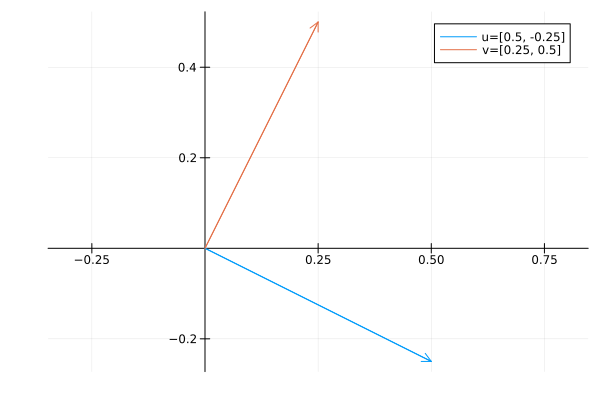

In [58]:
plot([0,  u[1]], [0, u[2]], arrow=true, label="u=$u")
plot!([0, v[1]], [0, v[2]], arrow=true, label="v=$v")

$Refl(\theta)$: Reflection Matrix

In [107]:
Refl(θ) = round.([cos(θ) sin(θ)
                 sin(θ)  -cos(θ)], digits=5)

Refl (generic function with 1 method)

Unit Coordinates are rotated by pi/2

In [110]:
θ = pi/4
xs = [[1,0] [0,1] [-1,0] [-1,-1]]

2×4 Matrix{Int64}:
 1  0  -1  -1
 0  1   0  -1

In [111]:
@Lx Refl(θ)*$xs = $(Rot(θ)*xs)

L"$\mathrm{Refl}\left( \theta \right) \cdot \left[
\begin{array}{cccc}
1 & 0 & -1 & -1 \\
0 & 1 & 0 & -1 \\
\end{array}
\right] = \left[
\begin{array}{cccc}
0.70711 & -0.70711 & -0.70711 & 0.0 \\
0.70711 & 0.70711 & -0.70711 & -1.41422 \\
\end{array}
\right]$"

Reflect: $u \to Refl(\theta) \cdot u$

In [120]:
θ = pi/4
u = [1,1]
v = Refl(θ)*u

2-element Vector{Float64}:
 1.41422
 0.0

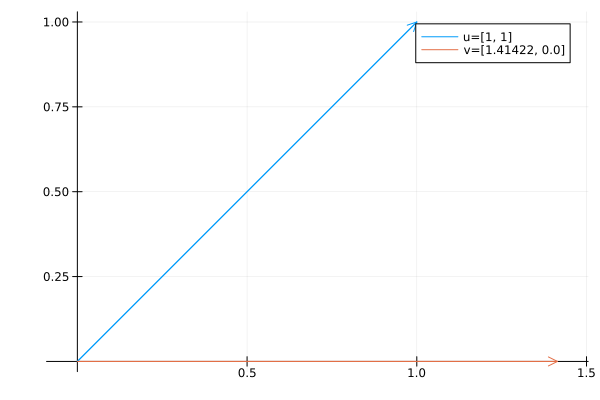

In [121]:
plot([0,  u[1]], [0, u[2]], arrow=true, label="u=$u")
plot!([0, v[1]], [0, v[2]], arrow=true, label="v=$v")

### Problems for Lecture 3 (from textbook Section I.5)

#### Problem 2. 
Draw unit vectors **u** and **v** that are *not* orthogonal. Show that **w** = **v** − **u**(**u**ᵀ**v**) is orthogonal to **u** (and add **w** to your picture).

In [64]:
u = [3,4]
u = round.(u/norm(u),digits=3)

2-element Vector{Float64}:
 0.6
 0.8

In [65]:
v=[1,1]
v=round.(v/norm(v),digits=3)

2-element Vector{Float64}:
 0.707
 0.707

In [66]:
w = v - u*(u'*v)
w = round.(w/norm(w),digits=3)

2-element Vector{Float64}:
  0.8
 -0.6

In [67]:
u'*w

0.0

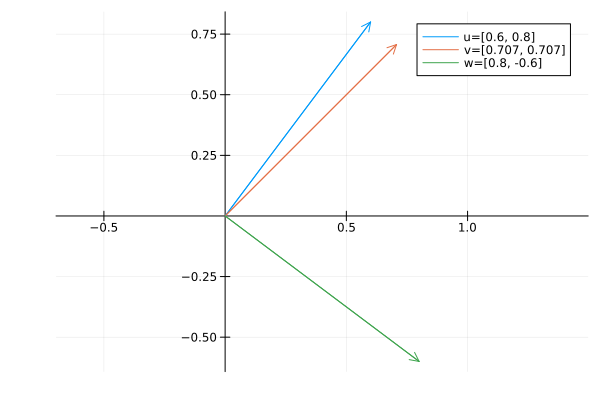

In [68]:
plot([0,  u[1]], [0, u[2]], arrow=true, label="u=$u")
plot!([0, v[1]], [0, v[2]], arrow=true, label="v=$v")
plot!([0, w[1]], [0, w[2]], arrow=true, label="w=$w")

**Prove:** If $u,v$ are unit vectors, then $u$ is orthogonal to $w = v − u(u'v)$

- If $w \perp u$ then need to demonstrate  $u' \cdot w = 0$

- $u'\cdot (v − u(u'v))$

- $u'v − u'u(u'v)$, by distribution

- $u'v − (u'u)u'v$, by association

- $u'v − (1)u'v$, since $u$ is a unit vector $(uu')=1$

- $0$ QED

Note: Only *u* needs to be a unit vector, not $v$ as well

#### Problem 4
Key property of every orthogonal matrix: ‖Q**x**‖² = ‖**x**‖² for every vector **x**. 

More than this, show that (Q**x**)ᵀ(Q**y**) = **x**ᵀ**y** for every vector **x** and **y**. 

So *lengths and angles are not changed by Q*. **Computations with Q never overflow!**

**Prove:** If $Q$ is an Orthogonal Matrix then for all $(x,y) \in R$: $(Qx)'(Qy) = x'y$ 

- By definition, an Orthogonal Matrix Q is Orthonormal

- $(Qx)'(Qy) = x'y$ 

- $x'Q'(Qy) = x'y$, where in general $(AB)' = B'A'$

- $x'('Q'Q)y = x'y$, by association

- $x'(I)y = x'y$, where for all Orthonormal Matricies $Q$: $QQ'= Q'Q = I$

- $x'y = x'y$, QED

#### Problem 6

A **permutation matrix** has the same columns as the identity matrix (in some order). Explain why this permutation matrix and every permutation matrix is orthogonal:

```
P = [0 1 0 0]
    [0 0 1 0]
    [0 0 0 1]
    [1 0 0 0]
```

has orthonormal columns so PᵀP = _____ and P⁻¹ = _____.

When a matrix is symmetric or orthogonal, **it will have orthogonal eigenvectors**. This is the most important source of orthogonal vectors in applied mathematics.

For Permutation Matrices:

$P'P = I$

and

$P^{-1} = P'$

In [69]:
P = [0 1 0 0
     0 0 1 0
     0 0 0 1
     1 0 0 0]

4×4 Matrix{Int64}:
 0  1  0  0
 0  0  1  0
 0  0  0  1
 1  0  0  0

In [70]:
P*P'

4×4 Matrix{Int64}:
 1  0  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  1

In [71]:
P^-1 == P'

true

**Eigen Vectors of Orthonormal Matrix are Orthogonal**

In [72]:
PV = eigvecs(P)

4×4 Matrix{ComplexF64}:
  0.5+0.0im   2.63942e-16+0.5im          …  0.5+0.0im
 -0.5+0.0im           0.5+1.34145e-16im     0.5+0.0im
  0.5+0.0im  -2.85805e-18-0.5im             0.5+0.0im
 -0.5+0.0im          -0.5-0.0im             0.5+0.0im

In [73]:
Int64.(round.(PV'*PV,digits=5))

4×4 Matrix{Int64}:
 1  0  0  0
 0  1  0  0
 0  0  1  0
 0  0  0  1

**Eigen Vectors of Symmetric Matrix are Orthogonal**

In [74]:
S=[1 2 3
  2 1 4
  3 4 1]

3×3 Matrix{Int64}:
 1  2  3
 2  1  4
 3  4  1

In [75]:
SV =eigvecs(S)

3×3 Matrix{Float64}:
 -0.255232   0.824038  -0.505785
 -0.601302  -0.544925  -0.584374
  0.757161  -0.154979  -0.634577

In [76]:
SV[:,1]'*SV[:,2]

-4.163336342344337e-17

In [77]:
SV'*SV

3×3 Matrix{Float64}:
  1.0          -4.16334e-17   1.11022e-16
 -4.16334e-17   1.0          -1.249e-16
  1.11022e-16  -1.249e-16     1.0